In [8]:
using LsqFit
using PyPlot

In [9]:
include("../compute_ttv.jl")
include("../ttv_succinct.jl")

ttv_succinct! (generic function with 1 method)

In [10]:
data1 = readdlm("../ttv_planet1.txt")[:,1]
data2 = readdlm("../ttv_planet2.txt")[:,1]

24-element Array{Float64,1}:
  8461.76
  8827.02
  9192.27
  9557.53
  9922.79
 10288.0 
 10653.3 
 11018.6 
 11383.8 
 11749.1 
 12114.3 
 12479.6 
 12844.8 
 13210.1 
 13575.4 
 13940.6 
 14305.9 
 14671.1 
 15036.4 
 15401.6 
 15766.9 
 16132.1 
 16497.4 
 16862.7 

In [11]:
ttv1 = zeros(Float64,length(data1))
ttv2 = zeros(Float64,length(data2))

24-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [51]:
#compute_ttv!(jmax::Integer,p1::Planet_plane_hk,p2::Planet_plane_hk,time1::Vector,time2::Vector,ttv1::Vector,ttv2::Vector)
jmax = 15
pl1 = TTVFaster.Planet_plane_hk{Float64}(0.05,3.5,1.0,0.1,0.4)
pl2 = TTVFaster.Planet_plane_hk{Float64}(0.05,15,1.0,0.1,0.1)
TTVFaster.compute_ttv!(jmax,pl1,pl2,data1,data2,ttv1,ttv2)

In [18]:
ttv2

24-element Array{Float64,1}:
 -0.00584383
 -0.0586168 
 -0.00106599
 -0.00634799
 -0.0546781 
  0.0167249 
 -0.0111274 
 -0.0447898 
  0.0320967 
 -0.0176669 
 -0.0289658 
  0.042244  
 -0.0228457 
 -0.00833565
  0.046396  
 -0.0237364 
  0.01266   
  0.0445895 
 -0.019178  
  0.0306859 
  0.0397291 
 -0.0089148 
  0.0431053 
  0.0348923 

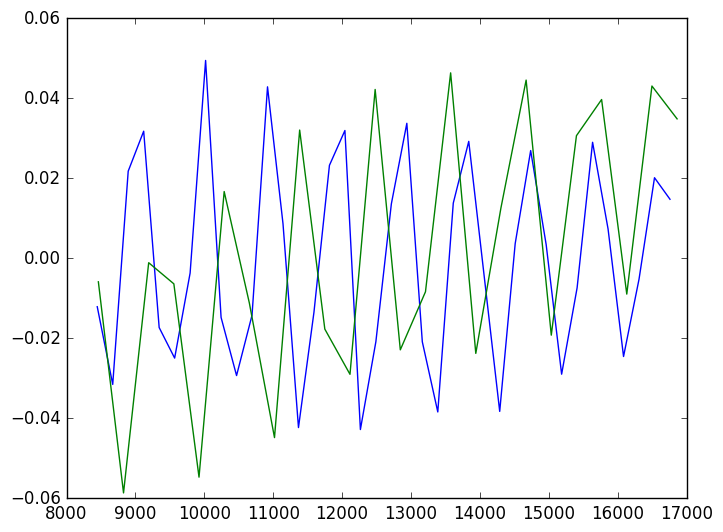

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc098c34650>

In [14]:
plot(data1,ttv1)
plot(data2,ttv2)

In [25]:
N = 2
len_arr = max(length(data1),length(data2))


38x2x2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮       
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

[:, :, 2] =
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 ⋮       
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [83]:
pl = Array(TTVFaster.Planet_plane_hk{Float64},N)
pl[1] = TTVFaster.Planet_plane_hk{Float64}(0.1,1.0,1.05,1.0,1.0)
pl[2] = TTVFaster.Planet_plane_hk{Float64}(0.2,1.68,1.0,1.0,1.0)
data = []
push!(data,data1)
push!(data,data2)
ttv_data= []
for i in 1:N
    push!(ttv_data,[zeros(Float64,length(data[i]),N)])
end
TTVFaster.compute_ttv!(jmax,pl1,pl2,data1,data2,ttv1,ttv2)
for i in 1:N
    for j in (i+1):N
        ttv_temp1 = ttv_data[i][:,j]
        ttv_temp2 = ttv_data[j][:,i]
        TTVFaster.compute_ttv!(2,pl[i],pl[j],data[i],data[j],ttv_temp1,ttv_temp2)
        ttv_data[i][:,j] = ttv_temp1
        ttv_data[j][:,i] = ttv_temp2
    end
end
TTVFaster.compute_ttv!(2,pl[1],pl[2],data[1],data[2],ttv1,ttv2)

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[83]:9
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[83], in expression starting on line 8
 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at ./abstractarray.jl:29
 [inlined code] from In[83]:9
 in anonymous at no file:0
 in include_string at loading.jl:282
 in execute_request_0x535c5df2 at /home/linc/.julia/v0.4/IJulia/src/execute_request.jl:182
 in eventloop at /home/linc/.julia/v0.4/IJulia/src/IJulia.jl:142
 in anonymous at task.jl:447
while loading In[83], in expression starting on line 8


In [78]:
#ttv_data[planet from list][planet array: pl col, transts rows]
ttv_data[2][:,1]

24-element Array{Float64,1}:
  4.00563  
 -1.54261  
 -1.8665   
  0.879983 
  0.731517 
  1.00422  
 -3.38048  
  2.89509  
  0.0346613
 -1.32373  
 -0.5423   
  0.817434 
  2.65964  
 -4.10156  
  1.21456  
  0.959629 
 -0.18445  
 -1.33675  
 -0.0492957
  3.77271  
 -3.56745  
 -0.039566 
  0.711682 
  1.16472  

In [79]:
ttv_data

2-element Array{Any,1}:
 38x2 Array{Float64,2}:
 0.0  -3.28993 
 0.0  -0.646195
 0.0   1.63543 
 0.0   1.31827 
 0.0  -1.67879 
 0.0  -2.77255 
 0.0   0.265737
 0.0   2.78994 
 0.0   2.15075 
 0.0  -1.18251 
 0.0  -2.81832 
 0.0  -0.756084
 0.0   1.81734 
 ⋮             
 0.0   0.172665
 0.0   2.78791 
 0.0   2.17971 
 0.0  -1.07383 
 0.0  -2.80433 
 0.0  -0.76842 
 0.0   1.78829 
 0.0   1.87682 
 0.0  -1.18073 
 0.0  -2.41357 
 0.0   0.341129
 0.0   2.96373 
 24x2 Array{Float64,2}:
  4.00563    0.0
 -1.54261    0.0
 -1.8665     0.0
  0.879983   0.0
  0.731517   0.0
  1.00422    0.0
 -3.38048    0.0
  2.89509    0.0
  0.0346613  0.0
 -1.32373    0.0
 -0.5423     0.0
  0.817434   0.0
  2.65964    0.0
 -4.10156    0.0
  1.21456    0.0
  0.959629   0.0
 -0.18445    0.0
 -1.33675    0.0
 -0.0492957  0.0
  3.77271    0.0
 -3.56745    0.0
 -0.039566   0.0
  0.711682   0.0
  1.16472    0.0        

In [75]:
data

2-element Array{Any,1}:
 [8445.5,8670.2,8894.9,9119.6,9344.3,9569.0,9793.7,10018.4,10243.1,10467.8  …  14737.1,14961.8,15186.5,15411.2,15635.9,15860.6,16085.3,16310.0,16534.7,16759.4]       
 [8461.76,8827.02,9192.27,9557.53,9922.79,10288.0,10653.3,11018.6,11383.8,11749.1  …  13575.4,13940.6,14305.9,14671.1,15036.4,15401.6,15766.9,16132.1,16497.4,16862.7]

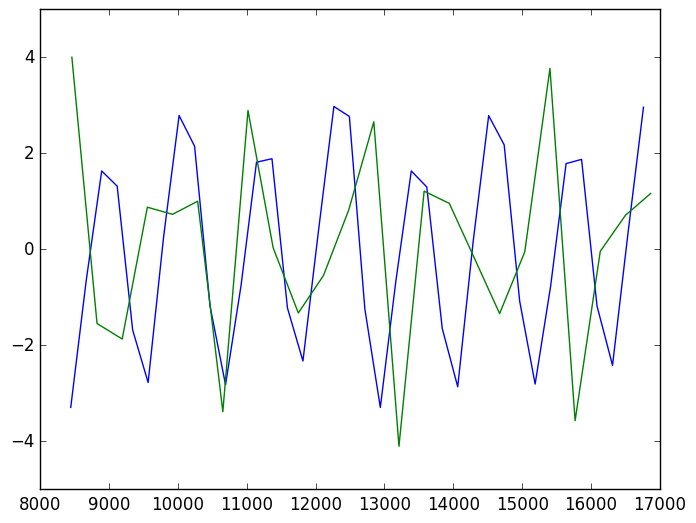

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc094416450>

In [80]:
plot(data[1],ttv_data[1][:,2])
plot(data[2],ttv_data[2][:,1])

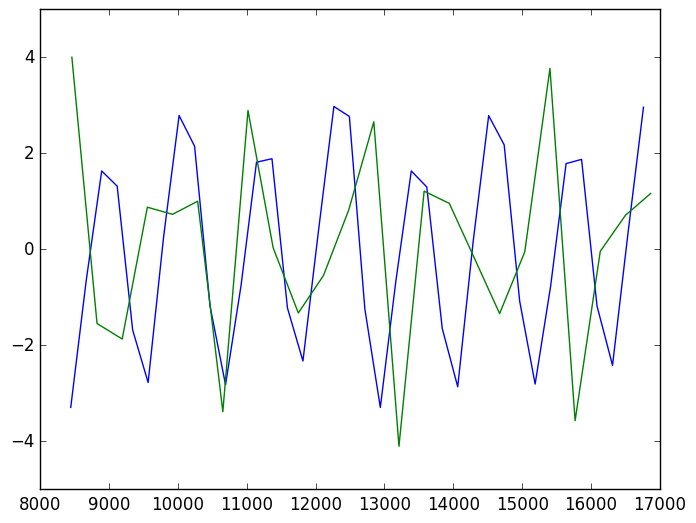

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc09423c350>

In [84]:
plot(data1,ttv1)
plot(data2,ttv2)